# Δένδρα και Κλίματα


---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Θα επιστρέψουμε στα [δεδομένα κρασιών από το βορρά της Πορτογαλίας](https://archive.ics.uci.edu/ml/datasets/wine).

* Πάμε να τα διαβάσουμε με το pandas.

* Θέλουμε να μπορούμε να προβλέψουμε την ποιότητα ενός κρασιού από τα υπόλοιπα δεδομένα που μας δίνονται γι' αυτό.

In [1]:
import pandas as pd

wine_df = pd.read_csv("wines.csv")
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,5.5,0.32,0.13,1.30,0.037,45.0,156.0,0.99184,3.26,0.38,10.7,0,5
1,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,5
2,6.3,0.23,0.22,3.75,0.039,37.0,116.0,0.99270,3.23,0.50,10.7,0,6
3,5.9,0.32,0.20,14.40,0.050,29.0,144.0,0.99666,3.24,0.41,10.3,0,6
4,5.7,0.16,0.32,1.20,0.036,7.0,89.0,0.99111,3.26,0.48,11.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.9,0.26,0.41,15.15,0.040,38.0,216.0,0.99760,2.96,0.60,10.0,0,6
6493,6.5,0.18,0.33,1.40,0.029,35.0,138.0,0.99114,3.36,0.60,11.5,0,7
6494,6.3,0.76,0.00,2.90,0.072,26.0,52.0,0.99379,3.51,0.60,11.5,1,6
6495,10.2,0.41,0.43,2.20,0.110,11.0,37.0,0.99728,3.16,0.67,10.8,1,5


* Θα διαμερίσουμε τα δεδομένα μας σε δεδομένα εκπαίδευσης και ελέγχου, κατά τα γνωστά.

* Θα πάρουμε όλες τις στήλες εκτός της στήλης `quality`, που θέλουμε να προβλέψουμε.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_df.loc[:, 'fixed acidity':'color'],
                                                    wine_df['quality'],
                                                    test_size=0.25,
                                                    random_state=42)

* Το αντικείμενό μας είναι αυτή τη φορά *παλινδρόμηση*.

* Θέλουμε να προβλέψουμε την *τιμή* ενός αριθμητικού μεγέθους.

* Θα χρησιμοποιήσουμε δένδρο αποφάσεων, όπως υλοποιείται από την κλάση `DecisionTreeRegressor`.

In [3]:
from sklearn.tree import DecisionTreeRegressor

wine_tree = DecisionTreeRegressor(max_depth=3)

wine_tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


* Για να δούμε πώς τα πήγαμε.

* Προσοχή: τώρα δεν μπορούμε να χρησιμοποιήσουμε ορθότητα, ακρίβεια, ανάκληση, κ.λπ., αφού προβλέπουμε μια αριθμητική τιμή.

* Θα χρησιμοποιήσουμε λοιπόν το μέσο απόλυτο λάθος (Mean Absolute Error, MAE):

$$ \mathrm {MAE} ={\frac {\sum _{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right|}{n}}$$

* Θα μπορούσαμε να χρησιμοποιήσουμε και το μέσο τετραγωνισμένο λάθος (Mean Squared Error, MSE), αλλά οι μονάδες του λάθους δεν θα είναι οι μονάδες της ποιότητας του κρασιού (θα είναι το τετράγωνό τους).

In [4]:
from sklearn import metrics

predicted = wine_tree.predict(X_test)
print(metrics.mean_absolute_error(y_test, predicted))

0.5894927147838183


* Για να καταλάβουμε τι συνέβη, μπορούμε να ζωγραφίσουμε το δένδρο αποφάσεων.

* Το χρώμα κάθε κόμβου αντιστοιχεί στη θέση του κόμβου στο πεδίο των τιμών (value).

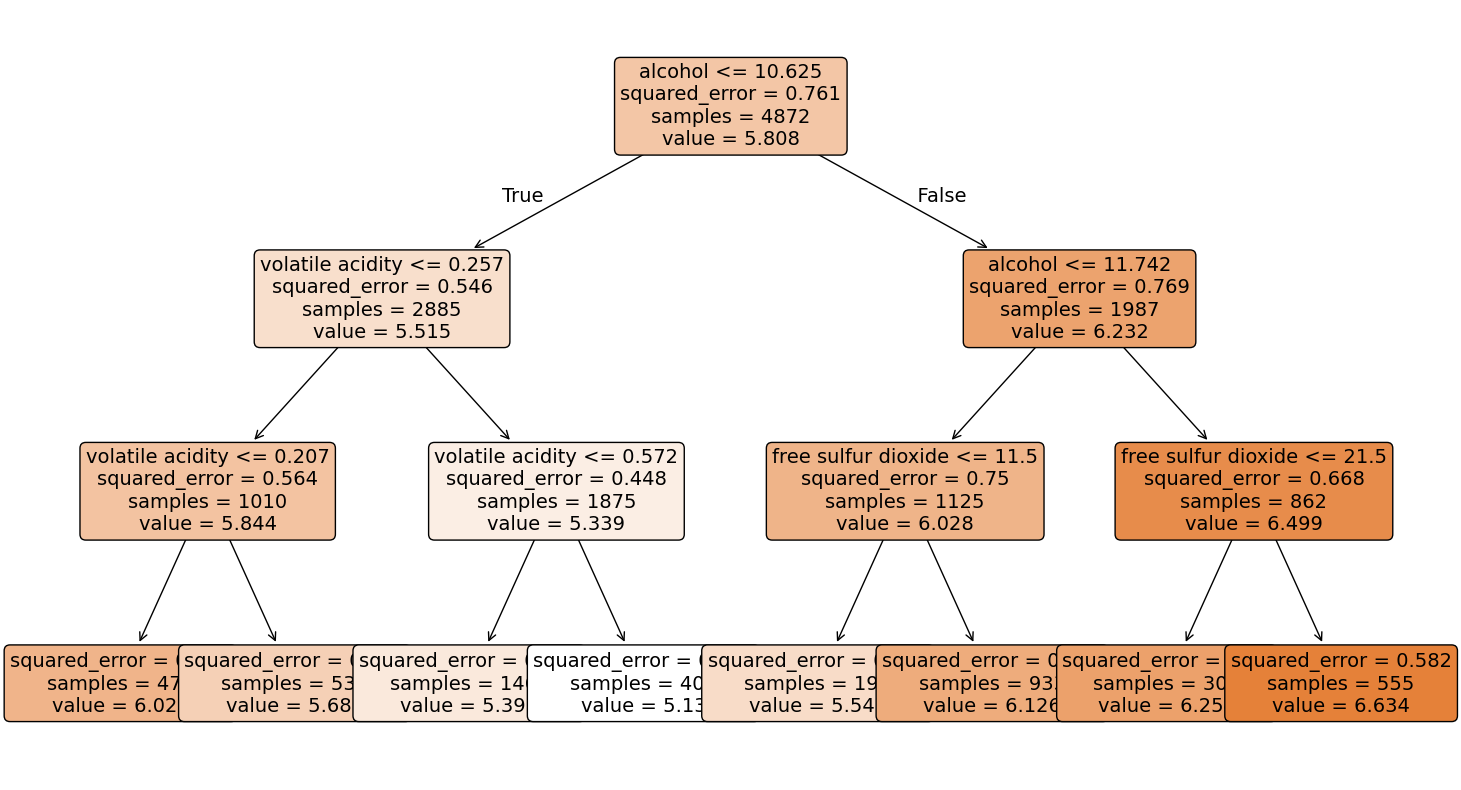

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(18, 10))
_ = tree.plot_tree(wine_tree, 
                   feature_names=wine_df.columns[:-1],
                   filled=True, rounded=True, fontsize=14)

* Για ένα καλύτερο αισθητικό αποτέλεσμα, μπορούμε να χρησιμοποιήσουμε το [GraphViz](https://graphviz.org/) και την διεπαφή της Python `graphviz`.

* To `graphviz` είναι βιβλιοθήκη της Python και εγκαθίσταται όπως οι βιβλιοθήκες της Python.

* Το GraphViz πρέπει να το εγκαταστήσουμε ξεχωριστά ακολουθώντας τις οδηγίες στη [σχετική σελίδα](https://graphviz.org/download/).

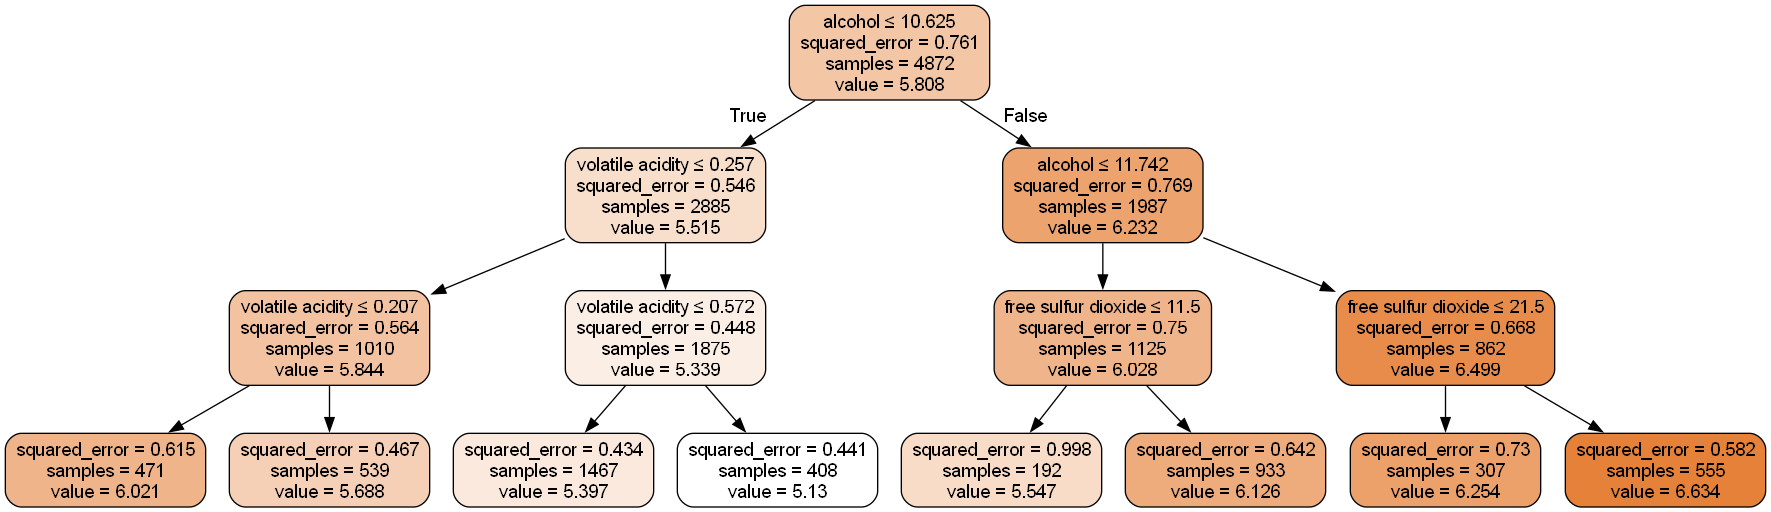

In [6]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Export decision tree to DOT format
dot_data = export_graphviz(wine_tree, 
                          out_file=None,  # Return string instead of writing to file
                          feature_names=wine_df.columns[:-1],  
                          filled=True, 
                          rounded=True,  
                          special_characters=True)

# Create graphviz object from DOT data
graph = graphviz.Source(dot_data)

# Display the image
Image(graph.pipe(format='png'))

* Μπορούμε επίσης να πάρουμε μια αναπαράσταση του δένδρου σε μορφή κανόνων κειμένου.

In [7]:
feature_names = list(wine_df.loc[:, 'fixed acidity':'color'].columns)
print(tree.export_text(wine_tree, feature_names=feature_names))

|--- alcohol <= 10.62
|   |--- volatile acidity <= 0.26
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- value: [6.02]
|   |   |--- volatile acidity >  0.21
|   |   |   |--- value: [5.69]
|   |--- volatile acidity >  0.26
|   |   |--- volatile acidity <= 0.57
|   |   |   |--- value: [5.40]
|   |   |--- volatile acidity >  0.57
|   |   |   |--- value: [5.13]
|--- alcohol >  10.62
|   |--- alcohol <= 11.74
|   |   |--- free sulfur dioxide <= 11.50
|   |   |   |--- value: [5.55]
|   |   |--- free sulfur dioxide >  11.50
|   |   |   |--- value: [6.13]
|   |--- alcohol >  11.74
|   |   |--- free sulfur dioxide <= 21.50
|   |   |   |--- value: [6.25]
|   |   |--- free sulfur dioxide >  21.50
|   |   |   |--- value: [6.63]



* Τα δένδρα αποφάσεων έχουν πάρα πολύ καλή ερμηνευσιμότητα.

* Τα δένδρα αποφάσεων κατασκευάζονται γρήγορα.

* Δεν χρειάζονται προσαρμογές (τύπου `StandardScaler`) στα δεδομένα.

* Επίσης, όπως θα δούμε, μπορούν να χρησιμοποιηθούν και για ταξινόμηση, και όχι μόνο για παλινδρόμηση.